# 1. Introducción

En el siguiente ejercicio se realizará la **rotación a 90°** de una imagen.

El algoritmo está basado en la **matriz de rotación** ampliamente difundida en plataformas en materia de álgebra como Wolfram [1]:

<center>
$$
\left(\begin{array}{cc} 
\cos\alpha & -\sin\alpha\\
\sin\alpha & \cos\alpha
\end{array}\right)
$$ 
</center>

La idea principal es mostrar la perfomance del funcionamiento de **estructuras de dos dimensiones** para gran cantidad de elementos.

Se utilizará exclusivamente Python con bibliotecas estándares para el manejo de imágenes.

---
# 2. Armado del ambiente


### Importación de **bibliotecas**


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image 
import numpy
from datetime import datetime

### Obtenemos la imagen

In [2]:
#@title ### 2.1. Parámetros de ejecución
#@markdown ---
#@markdown URL de la imagen:
url_imagen = "https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true" #@param {type:"string"}
#@markdown ---

# Obtenemos la imagen desde internet
!wget {url_imagen} -O imagen.jpg

--2020-11-22 21:10:35--  https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wvaliente/SOA_HPC/raw/main/unlam.jpg [following]
--2020-11-22 21:10:35--  https://github.com/wvaliente/SOA_HPC/raw/main/unlam.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wvaliente/SOA_HPC/main/unlam.jpg [following]
--2020-11-22 21:10:35--  https://raw.githubusercontent.com/wvaliente/SOA_HPC/main/unlam.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147032 (144K) [image/jp

# 3. Desarrollo

Tiempo de conversión de imagen:  883.054 [ms]
Tiempo Total: 945.738 [ms]


Imagen orginal: imagen.jpg - [1024, 768]



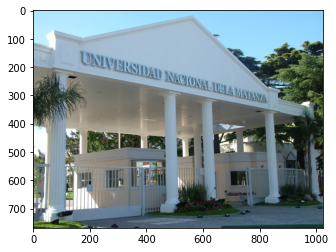

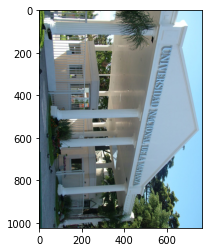

In [4]:
# Definición de función que transforma el tiempo en milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

# Capturamos el tiempo inicial
tiempo_total = datetime.now()

# Indicamos la imagen a cargar y creamos el objeto
img_nombre = 'imagen.jpg'
image = Image.open(img_nombre) 
  
# Obtenemos las proporciones de la imagen 
img_ancho, img_alto = image.size 

# Pasamos la imagen original comprimida en JPEG/PNG a array
img_cpu = numpy.asarray(image)

# Creamos una nueva imagen con las dimensiones invertidas
image_rot = Image.new(mode = "RGB", size = (img_alto, img_ancho))
img_cpu_rot = numpy.asarray(image_rot).copy()

# Capturamos el tiempo inicial de la rotación
tiempo_img = datetime.now()

# -- Rotamos la imagen --
# - La imagen original será recorrida desde la esquina superior izquierda hacia abajo
#   y luego hacia el ancho, volviendo a repetir el ciclo.
# - La imagen rotada se irá armando desde la esquina superior derecha hacia la izquierda
#   y luego hacia el nuevo alto, volviendo a repetir el ciclo.
for y  in range(0, img_ancho):
  for x in range(0, img_alto):
    img_cpu_rot[y][img_alto - x - 1] = img_cpu[x][y]

# Capturamos el tiempo total que tardó la rotación
tiempo_img = datetime.now() - tiempo_img

# Capturamos el tiempo total de todo el ejercicio
tiempo_total = datetime.now() - tiempo_total

# Mostramos el resultado del proceso
print("Tiempo de conversión de imagen: ", tiempo_en_ms(tiempo_img), "[ms]")
print("Tiempo Total:", tiempo_en_ms(tiempo_total), "[ms]\n\n")
print("Imagen orginal: " + img_nombre + " - [" + str(img_ancho) + ", " + str(img_alto ) + "]\n")  
plt.figure()
imgplot = plt.imshow(img_cpu)
plt.figure()
imgplot = plt.imshow(img_cpu_rot)

---
# 4. Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  @param                | Lectura de la dirección URL de la imagen (jpg) a procesar.
CPU      |  datetime.now()        | Toma el tiempo inicial del ejercicio.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  Image.size          | Obtenemos las proporciones de la imagen.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  Image.new()   | Genera la imagen que será el resultado. 
CPU      |  datetime.now()        | Toma el tiempo inicial del algoritmo.
CPU      |  1er y 2do for           | Rotación de la imagen.
CPU      |  datetime.now()        | Toma el tiempo final del algoritmo y del ejercicio.
CPU      | print                  | Muestra resultados del ejercicio.
CPU      | imshow                 | Muestra las imágenes (original y resultante).



---
# 5. Conclusiones

---
# 6. Bibliografía

[1] Matriz de rotación, Wolfram: [Página web](https://mathworld.wolfram.com/RotationMatrix.html)

